<a href="https://colab.research.google.com/github/dch312/hello-world/blob/master/Project_7_Image_classification_using_CNNs_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Data Description:

You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

Dataset:

The dataset can be download from Olympus. The data file names are:
- images.npy

- Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.



##Mount the drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
# Import necessary libraries.
import cv2
from google.colab.patches import cv2_imshow

In [3]:
import pandas as pd
#import label file from google drive
df = pd.read_csv("/content/drive/My Drive/Labels.csv")
df.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [4]:
df['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [5]:
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs

import warnings
warnings.filterwarnings('ignore')

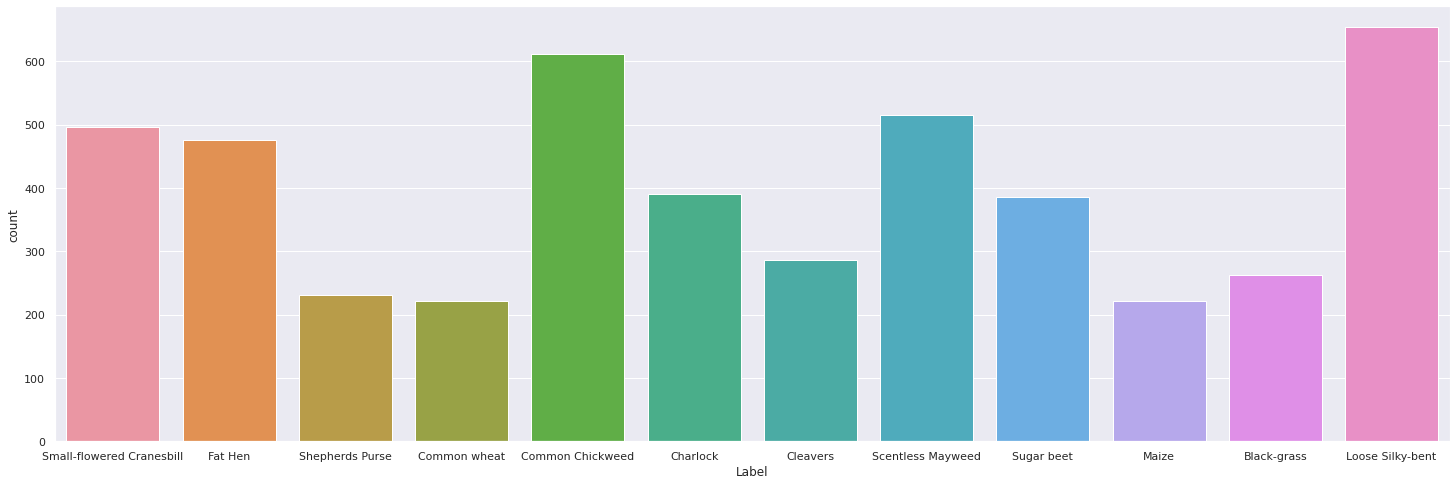

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
sns.countplot(df['Label'])

In [7]:
df['Label'] = df['Label'].map(lambda x: {"Small-flowered Cranesbill":0, "Fat Hen":1, "Shepherds Purse":2,
                                              "Common wheat":3, "Common Chickweed":4, "Charlock":5,"Cleavers":6,
                                              "Scentless Mayweed":7, "Sugar beet":8, "Maize":9,"Black-grass":10,
                                              "Loose Silky-bent":11}.get(x))
df.head()


,Label
0,0
1,0
2,0
3,0
4,0


In [8]:
df['Label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
import numpy as np
#import image files from google drive
dataset = np.load('/content/drive/My Drive/images.npy', encoding='bytes')

In [10]:
dataset.shape

(4750, 128, 128, 3)

In [11]:
dataset[1].shape

(128, 128, 3)

In [12]:
df.describe()

,Label
count,4750.000000
mean,5.520211
std,3.606210
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,11.000000


Label: 4


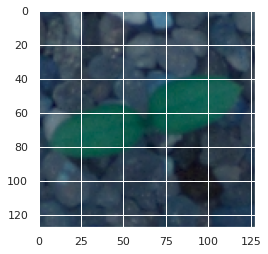

In [13]:

%matplotlib inline
print("Label: {}".format(df.Label[2000]))
plt.imshow(dataset[2000])


In [14]:
df.shape

(4750, 1)

In [15]:
n_rec=df.shape[0]
n_rec

4750

### Normalize data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize all image data together before split up
- make sure that the values are float so that we can get decimal points after division

In [16]:
dataset = dataset.astype('float32')
dataset /= 255


### Blur the images
- Gaussian Blurring.

In [17]:
data_blur = cv2.GaussianBlur(dataset[1],(3,3),cv2.BORDER_DEFAULT)

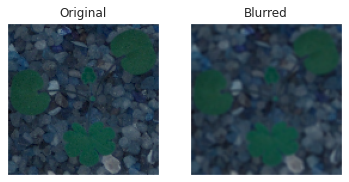

In [18]:
plt.subplot(121),plt.imshow(dataset[1]),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(data_blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
for i in range(n_rec):
 dataset[i] = cv2.GaussianBlur(dataset[i],(3,3),cv2.BORDER_DEFAULT)

In [20]:
dataset.shape

(4750, 128, 128, 3)

###Visulize the image after blurring

Label: 4


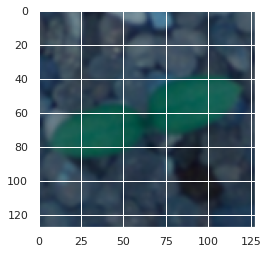

In [21]:
print("Label: {}".format(df.Label[2000]))
plt.imshow(dataset[2000])

Split dataset into train and test

In [22]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(dataset, df.Label, 
                                                                        test_size=0.3, random_state=42)


### Print shape of data and number of images
- print shape of train_images
- print number of train_images
- print shape of validation_images
- print number of validation_images
- print shape of test_images
- print number of test_images 

In [23]:
print(train_images.shape)
print(train_labels.shape)
#print(validation_images.shape)
#print(validation_labels.shape)
print(test_images.shape)
print(test_labels.shape)

print("train_images shape:", train_images.shape)
print("Images in train_images:", train_images.shape[0])
#print("Images in validation_images:", validation_images.shape[0])
print("Images in test_images:", test_images.shape[0])
print("Max value in train_images:", train_images.max())
print("Min value in train_images:", train_images.min())

(3325, 128, 128, 3)
(3325,)
(1425, 128, 128, 3)
(1425,)
train_images shape: (3325, 128, 128, 3)
Images in train_images: 3325
Images in test_images: 1425
Max value in train_images: 1.0
Min value in train_images: 0.0


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 12
- we are doing this to use categorical_crossentropy as loss

In [24]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=12)
test_labels = to_categorical(test_labels, num_classes=12)

print("Shape of train_labels:", train_labels.shape)
print("One value of train_labels:", train_labels[0])

Shape of train_labels: (3325, 12)
One value of train_labels: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### Reshape train and test sets into compatible shapes
- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
- do not reshape labels

In [25]:
#train_images = train_images.reshape(train_images.shape[0], 128, 128, 3)
#test_images = test_images.reshape(test_images.shape[0], 128, 128, 3)

###The shape of the data is already in compatible form with karas models, running the codes would be redundent

### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (128, 128, 3) for first layer
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [26]:
#from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))

### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels



In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               67108992  
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1548      
Total params: 67,120,684
Trainable params: 67,120,684
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
 
model.fit(x=train_images, y=train_labels, batch_size=32, epochs=15, validation_split = 0.2)
#Split the training data into trian and validation in 0.2 ratio

Epoch 1/15
84/84 [==============================] - 2s 27ms/step - loss: 3.0701 - accuracy: 0.1214 - val_loss: 2.3748 - val_accuracy: 0.1579
Epoch 2/15
84/84 [==============================] - 2s 25ms/step - loss: 2.2000 - accuracy: 0.2474 - val_loss: 1.8943 - val_accuracy: 0.3549
Epoch 3/15
84/84 [==============================] - 2s 24ms/step - loss: 1.5684 - accuracy: 0.4628 - val_loss: 1.4125 - val_accuracy: 0.5098
Epoch 4/15
84/84 [==============================] - 2s 25ms/step - loss: 1.0198 - accuracy: 0.6511 - val_loss: 1.4150 - val_accuracy: 0.5173
Epoch 5/15
84/84 [==============================] - 2s 25ms/step - loss: 0.7442 - accuracy: 0.7500 - val_loss: 1.0897 - val_accuracy: 0.6406
Epoch 6/15
84/84 [==============================] - 2s 25ms/step - loss: 0.6148 - accuracy: 0.8026 - val_loss: 1.1505 - val_accuracy: 0.6707
Epoch 7/15
84/84 [==============================] - 2s 25ms/step - loss: 0.3622 - accuracy: 0.8902 - val_loss: 1.1419 - val_accuracy: 0.6662
Epoch 8/15
84

##Final loss and accuracy

In [29]:
model.evaluate(test_images, test_labels)

45/45 [==============================] - 0s 10ms/step - loss: 1.7125 - accuracy: 0.6772


[1.7125223875045776, 0.6771929860115051]

Predicted label of # 3 image:  0
Predicted label of # 4 image:  5
Predicted label of # 34 image:  7
Predicted label of # 37 image:  11
Predicted label of # 60 image:  5


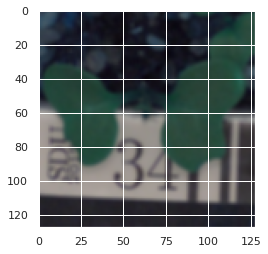

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
for n_pred in [2,3,33,36,59]:
    plt.imshow(test_images[n_pred].reshape(128, 128,3));
    y_pred = model.predict(test_images[n_pred].reshape(1, 128, 128, 3))
    print("Predicted label of #", n_pred+1, "image: ", y_pred.argmax())
    #print("Softmax Outputs:", y_pred)
    #print(y_pred.sum())

Actual Label of # 3 test image: 0
Actual Label of # 4 test image: 5
Actual Label of # 34 test image: 7
Actual Label of # 37 test image: 1
Actual Label of # 60 test image: 5


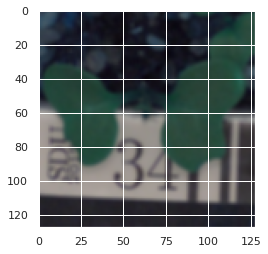

In [31]:
from numpy import argmax
for n in [2,3,33,36,59]:
   print("Actual Label of #",n+1,'test image:', argmax(test_labels[n]))
   plt.imshow(test_images[n].reshape(128, 128,3));


One or two image label(s) are predicted wrong in these five examples using the first model



In [32]:
#print out the confusion matrix of the model
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_images.reshape(test_images.shape[0], 128, 128, 3))
confusion_matrix(test_labels.argmax(1), y_pred.argmax(1))
print('Confusion matrix is as follows:')
confusion_matrix(test_labels.argmax(1), y_pred.argmax(1))

Confusion matrix is as follows:


array([[129,   3,  10,   0,   2,   7,   1,   1,   4,   2,   0,   1],
       [  5,  87,   1,   1,   5,   8,   4,   6,   7,   4,   1,  11],
       [  3,   6,  47,   1,   8,   4,   1,   6,   0,   6,   0,   0],
       [  0,   4,   0,  13,   0,   0,   0,   3,   1,   1,  16,  24],
       [  1,   6,   4,   0, 157,   0,   0,   4,   0,   6,   0,   1],
       [  6,   2,   0,   0,   0, 111,   2,   1,   1,   0,   0,   0],
       [  3,   3,   2,   0,   1,   6,  64,   4,   5,   2,   0,   0],
       [  0,   7,   9,   6,   5,   6,   3,  96,  13,   4,   2,   2],
       [  3,  22,   2,   0,   3,   1,   4,   5,  56,   4,   0,   2],
       [  1,   1,   1,   0,   4,   0,   0,   4,   0,  46,   0,   0],
       [  0,   3,   0,   7,   0,   0,   0,   0,   3,   1,  24,  42],
       [  3,  16,   0,  10,   0,   0,   0,   2,   1,   0,  30, 135]])

###Split dataset into train into train and valication further for the second and third models

In [33]:
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, 
                                                                       test_size=0.5, random_state=42)

### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D
#from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation="relu", input_shape=(128, 128, 3)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 12 units and activation function as 'softmax'
model.add(Dense(12, activation="softmax"))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               67108992  
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1548      
Total params: 67,120,684
Trainable params: 67,120,684
Non-trainable params: 0
_________________________________________________________________


### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [35]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=train_images, y=train_labels, batch_size=32, epochs=20, 
          validation_data=(validation_images, validation_labels), callbacks=[callback])

Epoch 1/20
52/52 [==============================] - 2s 36ms/step - loss: 0.3915 - accuracy: 0.9007 - val_loss: 0.3856 - val_accuracy: 0.9074
Epoch 2/20
52/52 [==============================] - 2s 30ms/step - loss: 0.1137 - accuracy: 0.9663 - val_loss: 0.3152 - val_accuracy: 0.9188
Epoch 3/20
52/52 [==============================] - 2s 30ms/step - loss: 0.0382 - accuracy: 0.9916 - val_loss: 0.2945 - val_accuracy: 0.9357
Epoch 4/20
52/52 [==============================] - 2s 31ms/step - loss: 0.0113 - accuracy: 0.9982 - val_loss: 0.3222 - val_accuracy: 0.9375
Epoch 5/20
52/52 [==============================] - 2s 30ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3213 - val_accuracy: 0.9357


Final loss and accuracy

In [36]:
model.evaluate(test_images, test_labels)

45/45 [==============================] - 0s 9ms/step - loss: 1.5597 - accuracy: 0.6807


[1.5596697330474854, 0.680701732635498]

Let's visualize results using matplotlib

Predicted label of # 3 image:  0
Actual Label of # 3 test image: 0
Softmax Outputs: [[9.9990225e-01 8.3512632e-06 8.7887223e-05 4.2857190e-17 1.1323299e-06
  2.6332867e-07 1.8045905e-07 1.5873047e-08 2.3683391e-09 3.5543849e-08
  1.3333439e-16 4.8298036e-11]]
1.0000001
Predicted label of # 4 image:  5
Actual Label of # 4 test image: 5
Softmax Outputs: [[5.4475487e-07 2.4780991e-09 2.0668230e-03 5.0325775e-13 1.0115321e-07
  9.9788398e-01 2.4783581e-06 2.4346909e-06 4.3639906e-05 4.6145943e-10
  6.7908894e-18 1.1544349e-11]]
1.0
Predicted label of # 34 image:  7
Actual Label of # 34 test image: 7
Softmax Outputs: [[2.3276352e-09 7.7802200e-09 2.2538366e-05 5.6655007e-11 3.3124372e-06
  1.4207581e-04 1.9794072e-06 9.9981993e-01 3.2769037e-10 1.0139219e-05
  7.5152797e-19 6.8969264e-10]]
0.99999994
Predicted label of # 37 image:  11
Actual Label of # 37 test image: 1
Softmax Outputs: [[3.3578312e-05 1.9185469e-02 4.2921411e-06 4.3189968e-07 3.5627329e-07
  5.6161523e-11 1.3884294e-06 2.50

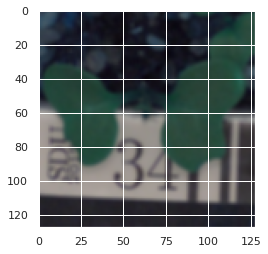

In [37]:
import matplotlib.pyplot as plt
from numpy import argmax
%matplotlib inline
for n_pred in [2,3,33,36,59]:
    plt.imshow(test_images[n_pred].reshape(128, 128,3));
    y_pred = model.predict(test_images[n_pred].reshape(1, 128, 128, 3))
    print("Predicted label of #", n_pred+1, "image: ", y_pred.argmax())
    print("Actual Label of #",n_pred+1,'test image:', argmax(test_labels[n_pred]))
    print("Softmax Outputs:", y_pred)
    print(y_pred.sum())

###The second model also predict one or two labels incorrectly out of the five examples

###Print out the confusion matrix of the second model

In [38]:
#print out the confusion matrix of the model
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_images.reshape(test_images.shape[0], 128, 128, 3))
confusion_matrix(test_labels.argmax(1), y_pred.argmax(1))
print('Confusion matrix of the second model is as follows:')
confusion_matrix(test_labels.argmax(1), y_pred.argmax(1))

Confusion matrix of the second model is as follows:


array([[130,   3,   7,   0,   1,   7,   1,   3,   7,   0,   0,   1],
       [  4,  85,   3,   0,   8,   7,   3,   3,   7,   0,   1,  19],
       [  7,   7,  38,   1,  11,   3,   1,  10,   1,   3,   0,   0],
       [  0,   7,   0,  14,   0,   0,   1,   2,   3,   1,  16,  18],
       [  2,   6,   4,   0, 159,   0,   1,   2,   1,   3,   0,   1],
       [  5,   0,   2,   1,   0, 108,   3,   2,   2,   0,   0,   0],
       [  3,   3,   1,   1,   1,   3,  70,   3,   5,   0,   0,   0],
       [  0,   6,   8,   1,   8,   2,   3, 102,  16,   2,   1,   4],
       [  3,  22,   2,   2,   2,   1,   2,   7,  57,   3,   0,   1],
       [  1,   2,   1,   0,   4,   0,   0,   4,   3,  42,   0,   0],
       [  0,   2,   0,   3,   1,   0,   0,   0,   4,   1,  20,  49],
       [  1,  16,   0,   8,   0,   0,   0,   1,   1,   0,  25, 145]])

In [39]:
batch_size = None
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from keras.layers import BatchNormalization
from keras.layers import Input, Flatten, Dense, Dropout, Convolution2D, Conv2D, MaxPooling2D, Lambda, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, AveragePooling2D, Concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils

model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=dataset.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)       

In [40]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)       

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto'
                                                            )

Epoch 1/40
52/52 [==============================] - ETA: 0s - loss: 4.2874 - accuracy: 0.1522
Epoch 00001: val_loss improved from inf to 2.49598, saving model to cifar_cnn_checkpoint_01_loss2.4960.h5
52/52 [==============================] - 2s 31ms/step - loss: 4.2874 - accuracy: 0.1522 - val_loss: 2.4960 - val_accuracy: 0.0824
Epoch 2/40
50/52 [===========================>..] - ETA: 0s - loss: 2.1837 - accuracy: 0.2663
Epoch 00002: val_loss did not improve from 2.49598
52/52 [==============================] - 1s 24ms/step - loss: 2.1783 - accuracy: 0.2665 - val_loss: 2.5019 - val_accuracy: 0.0800
Epoch 3/40
52/52 [==============================] - ETA: 0s - loss: 1.9019 - accuracy: 0.3490
Epoch 00003: val_loss did not improve from 2.49598
52/52 [==============================] - 1s 25ms/step - loss: 1.9019 - accuracy: 0.3490 - val_loss: 2.5626 - val_accuracy: 0.0607
Epoch 4/40
52/52 [==============================] - ETA: 0s - loss: 1.7802 - accuracy: 0.3694
Epoch 00004: val_loss did 

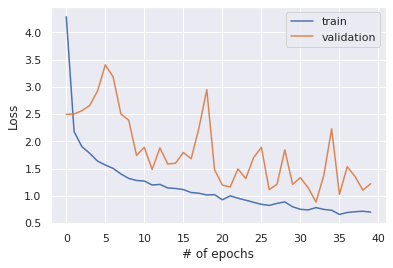

In [44]:
epochs = 40
history = model.fit(train_images,
                    train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(validation_images, validation_labels),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel('Loss')
plt.xlabel('# of epochs')
plt.legend()
plt.show()

In [45]:

scores = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


45/45 [==============================] - 0s 8ms/step - loss: 1.2584 - accuracy: 0.5361
Test loss: 1.2584336996078491
Test accuracy: 0.5361403226852417


Predicted label of # 3 image:  0
Actual Label of # 3 test image: 0
Softmax Outputs: [[0.29003826 0.05784854 0.14912935 0.00395172 0.14117877 0.02153433
  0.01860488 0.1585495  0.08903395 0.05523738 0.00531745 0.00957594]]
1.0
Predicted label of # 4 image:  7
Actual Label of # 4 test image: 5
Softmax Outputs: [[0.08566547 0.01027721 0.13000832 0.01236038 0.00806649 0.16847463
  0.05346506 0.3721503  0.09353487 0.06016879 0.0022785  0.00354994]]
1.0000001
Predicted label of # 34 image:  7
Actual Label of # 34 test image: 7
Softmax Outputs: [[1.0895013e-02 1.3909169e-03 2.0042613e-01 1.7880313e-03 3.8357594e-03
  1.1907950e-02 7.0284079e-03 7.3780507e-01 1.5090411e-02 9.2664501e-03
  7.9133330e-05 4.8669474e-04]]
0.99999994
Predicted label of # 37 image:  9
Actual Label of # 37 test image: 1
Softmax Outputs: [[1.3570663e-03 1.1714901e-02 1.5050067e-02 2.5221616e-01 6.3918005e-03
  2.1129230e-04 4.8379968e-03 7.4690260e-02 1.9544969e-01 2.9586139e-01
  1.1232824e-02 1.3098654e-01]]
1.0
Pre

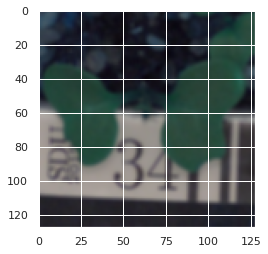

In [46]:
import matplotlib.pyplot as plt
from numpy import argmax
%matplotlib inline
for n_pred in [2,3,33,36,59]:
    plt.imshow(test_images[n_pred].reshape(128, 128,3));
    y_pred = model.predict(test_images[n_pred].reshape(1, 128, 128, 3))
    print("Predicted label of #", n_pred+1, "image: ", y_pred.argmax())
    print("Actual Label of #",n_pred+1,'test image:', argmax(test_labels[n_pred]))
    print("Softmax Outputs:", y_pred)
    print(y_pred.sum())

###The third model predict two incorrectly out of five
###Print out the confusion matrix of the third model

In [86]:
#print out the confusion matrix of the model
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_images.reshape(test_images.shape[0], 128, 128, 3))
confusion_matrix(test_labels.argmax(1), y_pred.argmax(1))
print('Confusion matrix is as follows:')
confusion_matrix(test_labels.argmax(1), y_pred.argmax(1))

Confusion matrix is as follows:


array([[101,   9,   0,   4,   0,   1,  32,  13,   0,   0,   0,   0],
       [  3,  33,   0,  46,   1,   3,  11,  10,   0,   0,   1,  32],
       [ 16,   0,   0,   5,   0,   0,  14,  47,   0,   0,   0,   0],
       [  0,   0,   0,  53,   0,   0,   0,   0,   0,   0,   0,   9],
       [ 24,  12,   0,   1,  79,   0,   1,  45,   0,   0,   0,  17],
       [  2,   0,   0,   6,   0,  22,  71,  22,   0,   0,   0,   0],
       [  0,   0,   0,  41,   0,   0,  48,   0,   0,   0,   0,   1],
       [  0,   0,   0,  17,   0,   3,   5, 102,   1,   0,   0,  25],
       [  0,   0,   0,  21,   0,   1,   1,  71,   3,   0,   0,   5],
       [  9,   0,   0,   7,   0,   2,   6,  20,   0,  13,   0,   0],
       [  0,   0,   0,  14,   0,   0,   0,   0,   0,   0,   0,  66],
       [  0,   0,   0,  19,   0,   0,   0,   0,   0,   0,   0, 178]])

##Summary: A total of three models are attempted, the last model presents the best results. Here are a couple of takeaways:
- The training and validation split ratio has been replaced as 0.2 (in the second and third models) instead of 0.5 outlined in the project requirement as it leaves more data for training so that the model performs better
- The models seems to be able to achieve similar results without Gaussian blurring


